# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

In [9]:
! git clone https://github.com/ds3001f25/visualization_assignment.git
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

fatal: destination path 'visualization_assignment' already exists and is not an empty directory.


**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

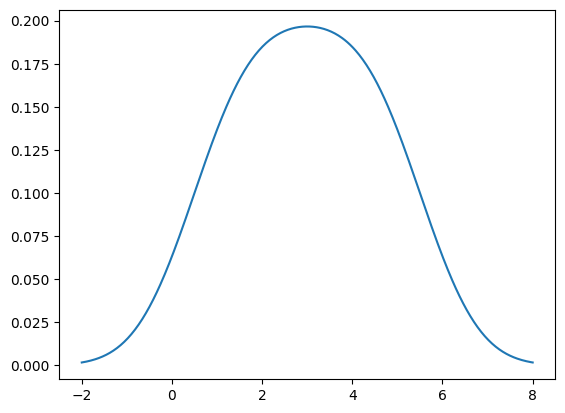

In [15]:


def kernel_density(input, kernel='gaussian', bandwidth='silverman'):
  M = 500 # steps for grid
  grid = np.linspace(-2,8,M) # Grid for plotting values
  N = len(input)
  sd = np.std(input)
  if bandwidth == 'silverman':
    bandwidth = 1.06 * sd * N**(-1/5)
  z = (cdist(grid.reshape(-1,1), np.array(input).reshape(-1,1)))/bandwidth
  for i in range(N):
    if kernel == 'gaussian':
      density = np.exp(-((z**2)/2)) / np.sqrt(2*np.pi)
    if kernel == 'uniform':
      density = (np.abs(z)<=1)*(.5)
    if kernel == 'epanechnikov':
      density = (np.abs(z<=1))*(3/4)*(1-(z)**2)
  kde = density.mean(axis=1) / bandwidth
  sns.lineplot(x=grid,y=kde)
  plt.show()

df = pd.read_csv('visualization_assignment/data/pretrial_data.csv',low_memory=False)
kernel_density([1,2,3,4,5])




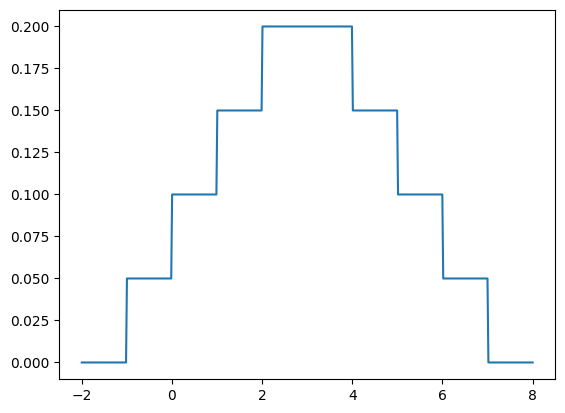

In [16]:
kernel_density([1,2,3,4,5], kernel='uniform', bandwidth=2)

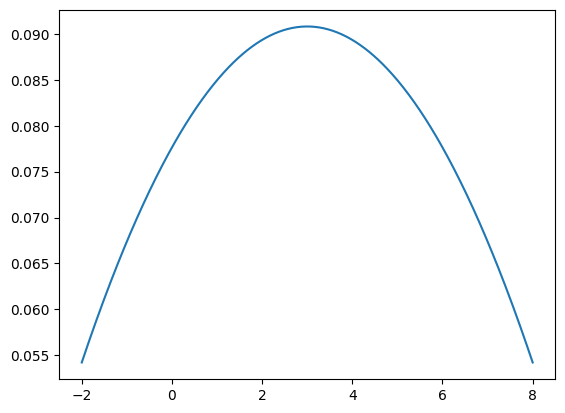

In [17]:
kernel_density([1,2,3,4,5], kernel='epanechnikov', bandwidth=8)

<Axes: ylabel='Density'>

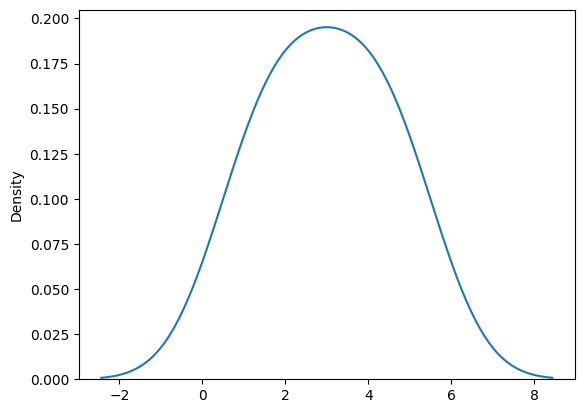

In [18]:
sns.kdeplot([1,2,3,4,5])

In [ ]:
#Q1
#I ran into a lot of errors when I was trying to write this function, like runtime, figuring out where to put my if statements, how to determine z, and more
#One major problem im still having is that even when switching from for loops to cdist, I still can't get it to run using the pretrial data set because it takes too long
#I decided to test it with a smaller dataset. Using all of the default settings, the kdeplot looks exactly like my kernel density function
#When I was playing around with some of the other settings, it looks different but also has the same general shape

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [4]:
df = pd.read_csv('visualization_assignment/data/college_completion.csv',low_memory=False)

In [ ]:
#Q2
#The table has 3,798 rows and 63 columns, meaning 3,798 observations with 63 variables. Some examples of the variables include the college's
#city, state, level, public/private, description, graduation rates, transfer information, etc.

In [5]:
#Q3
pd.crosstab(df['control'],df['level'])
#I was surprised to see that the majority of public schools in this data set are actually 2-year prorgrams, pretty significantly.
#In private for-profit schools, it's a pretty even split, with there being slightly more 4-year programs. On the other hand,
#privat not-for-profit has very few 2-year programs, with the large majority being 4-year programs

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: xlabel='grad_100_value', ylabel='Count'>

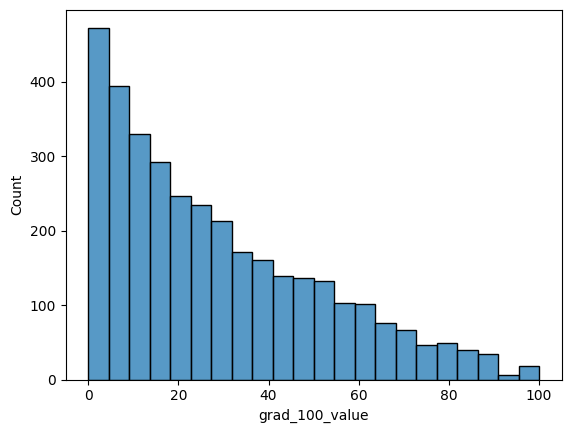

In [6]:
#Q4
#Histogram
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

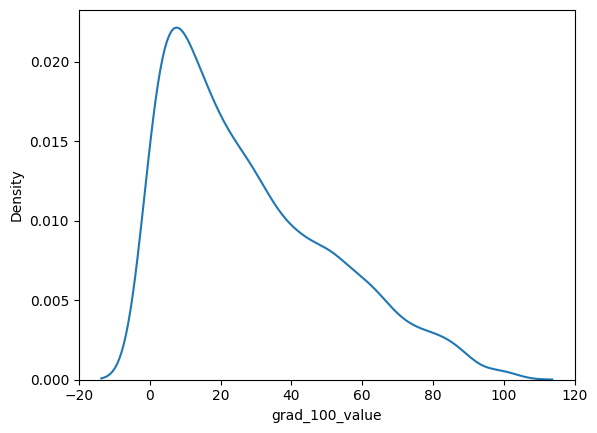

In [7]:
#Q4
#Kernel density plot
sns.kdeplot(df['grad_100_value'])

<Axes: ylabel='grad_100_value'>

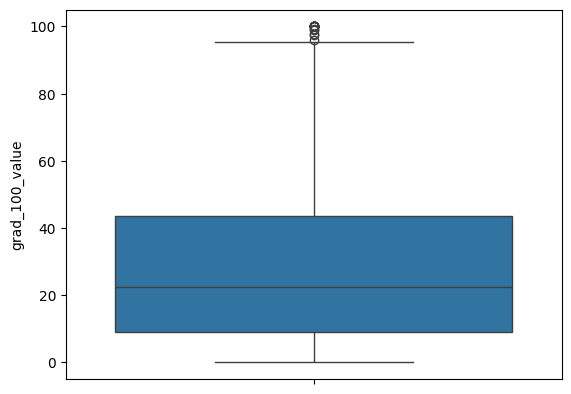

In [8]:
#Q4
#Boxplot
sns.boxplot(df['grad_100_value'])

In [9]:
#Q4
#Statistical Description
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [12]:
#Q5
df['grad_100_value'].groupby(df['level']).describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


In [ ]:
#Q5
#When grouped by 2-year and 4-year, it seems that at each interval and mean, the 4-year programs have a higher graduation rate

In [13]:
#Q5
df['grad_100_value'].groupby(df['control']).describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [ ]:
#Q5
#When grouped by control, private not-for-profit has the highest gradutation rate

<Axes: xlabel='graduation rate', ylabel='Density'>

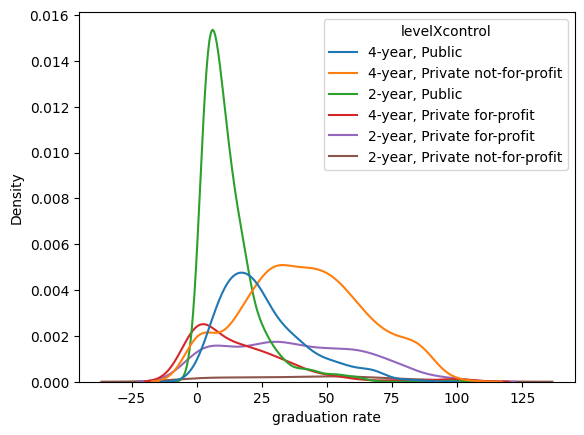

In [23]:
#Q6
#Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control.
#Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
df['levelXcontrol'] = df['level']+', '+df['control']

# Melt the DataFrame to long format for plotting with hue
df_melted = df.melt(id_vars=['levelXcontrol'], value_vars=['grad_100_value'], var_name='variable', value_name='graduation rate')

sns.kdeplot(data=df_melted, x='graduation rate', hue='levelXcontrol')

In [ ]:
#Once again, it seems like 4-year, private not-for-profit schools have the highest graduation rate

<Axes: xlabel='aid_value', ylabel='Density'>

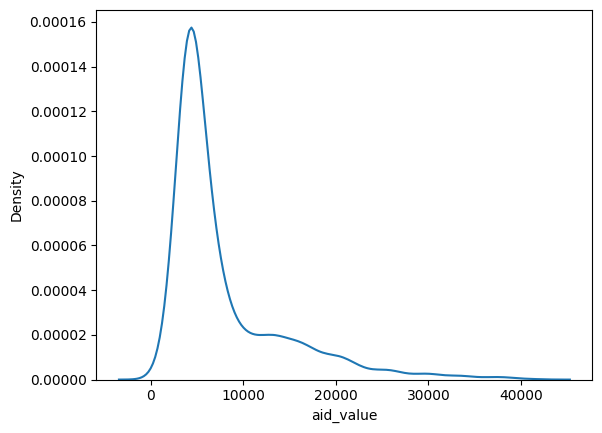

In [20]:
#Q7
#Make a kernel density plot of aid_value. Now group your graph by level and control.
#What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.
sns.kdeplot(df['aid_value'])


<Axes: xlabel='aid value', ylabel='Density'>

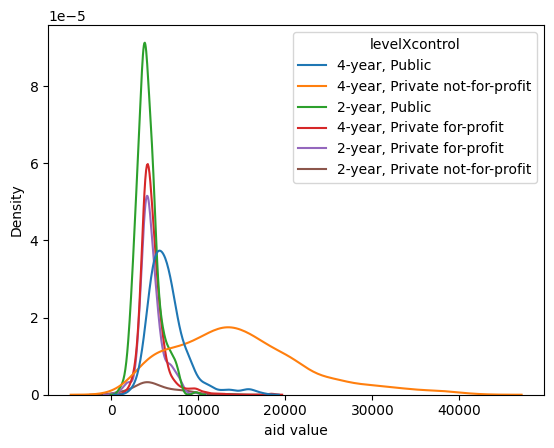

In [24]:
#Q7
# Melt the DataFrame to long format for plotting with hue
df_melted = df.melt(id_vars=['levelXcontrol'], value_vars=['aid_value'], var_name='variable', value_name='aid value')

sns.kdeplot(data=df_melted, x='aid value', hue='levelXcontrol')

In [25]:
#Q7
df['aid_value'].groupby(df['levelXcontrol']).describe()

,count,mean,std,min,25%,50%,75%,max
levelXcontrol,,,,,,,,
"2-year, Private for-profit",464.0,4559.681034,1286.688269,294.0,3818.75,4286.5,5122.00,9727.0
"2-year, Private not-for-profit",68.0,5128.058824,2590.449946,934.0,3650.00,4516.5,6311.50,13654.0
"2-year, Public",926.0,4126.199784,1260.271382,881.0,3311.25,3943.5,4762.00,9809.0
"4-year, Private for-profit",527.0,4696.062619,1489.410020,1580.0,3885.50,4364.0,5131.50,18355.0
"4-year, Private not-for-profit",1180.0,14702.401695,7649.775203,902.0,9113.25,13774.5,18996.75,41580.0
"4-year, Public",632.0,6514.071203,2353.716693,2232.0,4990.50,6085.0,7341.50,17299.0


In [ ]:
#Q7
#The shape of the graph is beecause most of the mean values are somewhere between 4000-6500, so they all peak at relatively the same place.
#Most of them don't go above 20,000, with some noe even going above 10,000. However, 4-year private not-for-profit has a mean of almost 15,000 and a maximum of over 41,000
#which is why the peak and tail are much further to the right

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

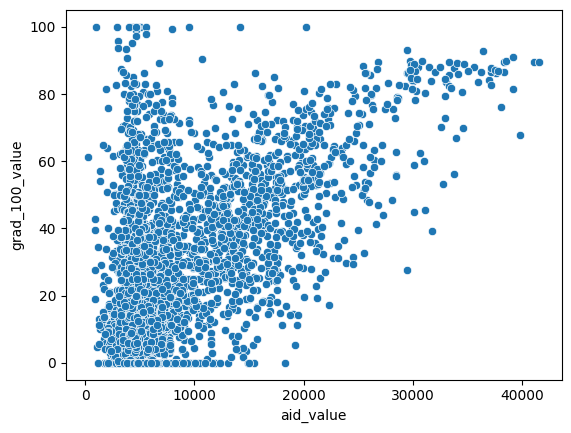

In [26]:
#Q8
#Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control.
#Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

sns.scatterplot(data=df, x='aid_value', y='grad_100_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

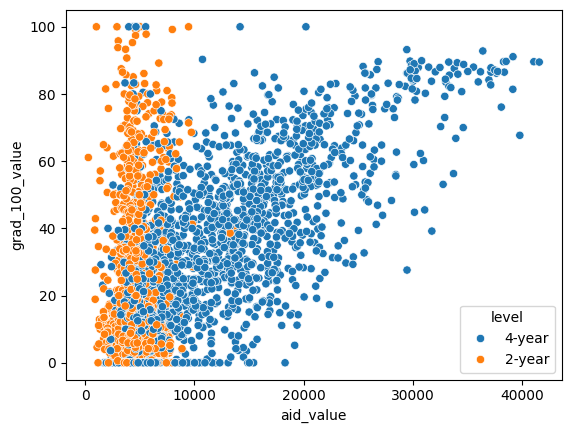

In [27]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

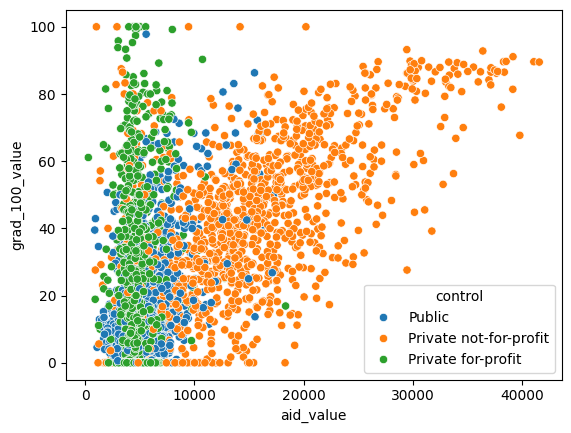

In [28]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')

In [ ]:
#Q8
#It seems like public and private-for-profit schools don't tend to give much in aid, so it doesn't seem like aid boosts grad rates too much.
#Similarly, it doesn't seem like 2-year programs give much in aid.
#However there does seems to be a positive correlation between aid and graduation rates in 4-year programs and private not-for-profit schools.